<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Aprendizaje no supervisado</h1>
<br/><br/>
    <b>Instructor Principal:</b> Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Algoritmos de aprendizaje supervisados vs no supervisados

# Aprendizaje supervisado

- Algoritmo es guiado en el proceso de aprendizaje (se le indica qué debe aprender)
- Ej:
    - En algoritmo de regresión lineal, el modelo calcula parámetros que mejor se ajustan a datos conocidos
- ¿Qué ocurre si no contamos con esta información?
    - R: Algoritmos no supervisados

## Aprendizaje no supervisado

- No existe información previa sobre qué es lo que debe aprender el algoritmo
- El algoritmo tiene libertad para aprender patrones de interés en los datos

# Agrupamiento (Clustering)

- Al igual que en clasificación, clustering asigna cada dato a un grupo
- En el caso de clustering, los grupos **no son conocidos de antemano**

<img src='images/clusteringExample.png' width=800>

<img src='images/kmeans.png' width=800>

# K-Means 

Text(0, 0.5, 'Petal width')

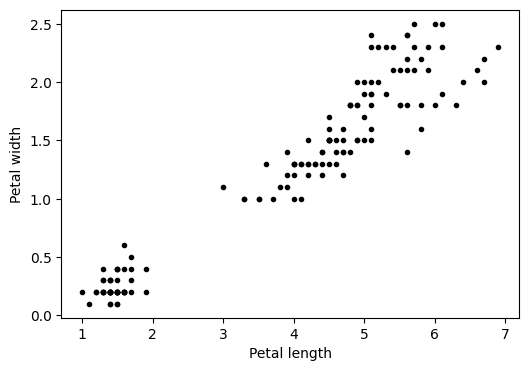

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:,2:]
y = iris.target
fig = plt.figure(figsize=(13,4))
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[:, 0],X[:,1],'k.')
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

- K-Means permite agrupar datos a partir de un número especificado de clusters.
- Para K-Means es necesario **especificar** el número de clusters de antemano. En algunos casos este número sera obvio, pero en otros no.
- Cada clúster se marca inicialmente con un centroide. Este se va actualizando hasta ajustarse a las agrupaciones existentes

In [10]:
# Entrenamiento de K-Means
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

y_pred = kmeans.predict(X)
y_pred

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

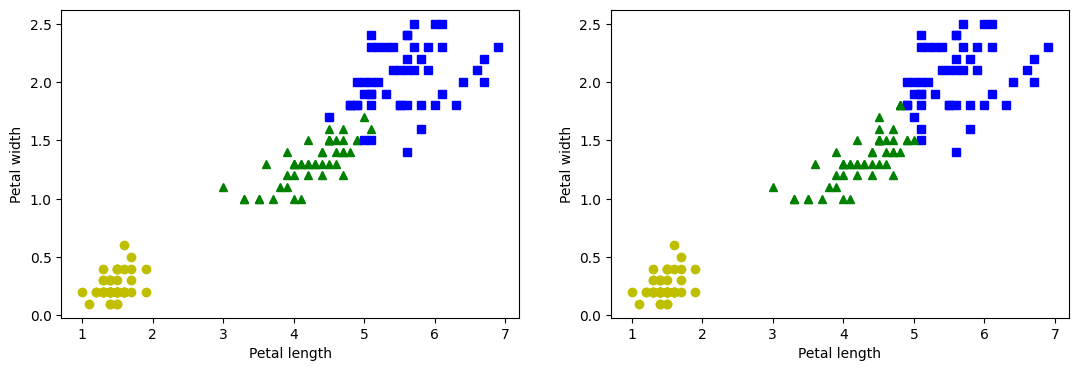

-31.371358974358984


In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'yo')
ax1.plot(X[y==1,0],X[y==1,1],'g^')
ax1.plot(X[y==2,0],X[y==2,1],'bs')
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')
# Índice de agrupación cambia, pero agrupaciones se mantienen
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_pred==0,0],X[y_pred==0,1],'yo')
ax2.plot(X[y_pred==1,0],X[y_pred==1,1],'bs')
ax2.plot(X[y_pred==2,0],X[y_pred==2,1],'g^')
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

plt.show()

# Score representa la inercia del modelo (distancia cuadrática media entre cada dato y su centroide)
# Se muestra con valor negativo pues método score de scikit learn debe cumplir con
# "mayor valor, mejor"
print(kmeans.score(X))

## Método del codo

- En caso de no conocer el número de clusters, una buena aproximación es el método del codo
- Se selecciona como número de clusters a aquel que produce el último decremento importante en la inercia.

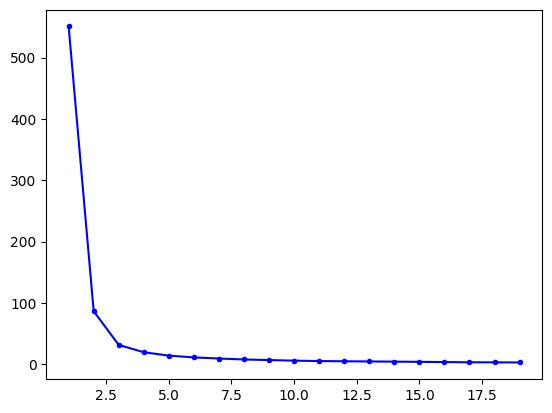

In [14]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    

plt.plot(k_clusters, score,'b.-')

# Agrupamiento Jerárquico

- Algoritmo que define jerarquía en los datos para generar agrupaciones

- **Agrupamiento aglomerativo**: A partir de los datos individuales, se agrupan gradualmente hasta formar uno o mútiples grandes grupos
- **Agrupamiento divisional**: A partir de los datos agrupados, se dividen gradualmente hasta formar mútiples grupos pequeños.

In [2]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=3)


In [3]:
agg_cluster

AgglomerativeClustering(n_clusters=3)

In [4]:
y_pred = agg_cluster.fit_predict(X)

In [5]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


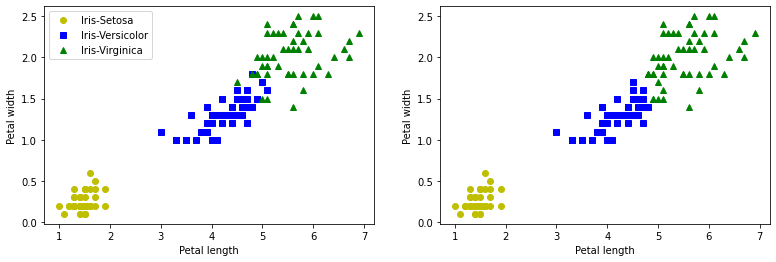

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'yo')
ax1.plot(X[y==1,0],X[y==1,1],'bs')
ax1.plot(X[y==2,0],X[y==2,1],'g^')
ax1.legend(['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

# Índice de agrupación cambia, pero agrupaciones se mantienen
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_pred==0,0],X[y_pred==0,1],'g^')
ax2.plot(X[y_pred==1,0],X[y_pred==1,1],'yo')
ax2.plot(X[y_pred==2,0],X[y_pred==2,1],'bs')
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

plt.show()

# DBSCAN

- Density-based spatial clustering of applications with noise
- Algoritmo capaz de identificar clúster de agrupación en base a la "densidad" de los datos.
- Paso a paso:
    - Por cada instancia, se cuentan cuántas instancias están dentro de una distancia $\epsilon$ (vecindario $\epsilon$)
    - Si una instancia tienen al menos `min_samples` instancias en su vecindario, es considerada una instacia `core`.
    - Todas las instancias en el vecindario de una instancia core pertenecen al mismo clúster (incluídas otras instancias core).
    - Cualquier instancia que no sea una instancia core o no pertenezca a un vecindario, es considerada anomalía.

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)


In [36]:
y_pred = dbscan.fit_predict(X)
print(y_pred)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  2 -1  2 -1  1 -1 -1 -1  1  1  2  1 -1 -1 -1 -1 -1  1
  2  1 -1  1  2 -1  1  1  2 -1 -1 -1  2  1 -1 -1  2 -1  1  2  2 -1  1  2
  2 -1  1  1 -1  1]


In [37]:
count=0
for i in range(0, len(y_pred)):
    if y_pred[i]==-1:
        count=count+1
print(count)

30


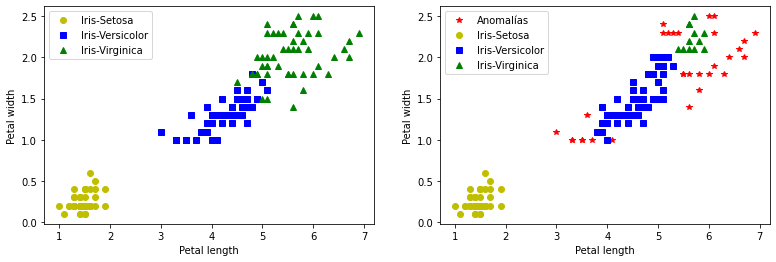

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'yo')
ax1.plot(X[y==1,0],X[y==1,1],'bs')
ax1.plot(X[y==2,0],X[y==2,1],'g^')
ax1.legend(['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

# Índice de agrupación cambia, pero agrupaciones se mantienen
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_pred==-1,0],X[y_pred==-1,1],'r*') # Anomalías
ax2.plot(X[y_pred==0,0],X[y_pred==0,1],'yo')
ax2.plot(X[y_pred==1,0],X[y_pred==1,1],'bs')
ax2.plot(X[y_pred==2,0],X[y_pred==2,1],'g^')
ax2.legend(['Anomalías', 'Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

plt.show()

# Actividad 7

Scikit Learn no solo provee algunos datasets populares. También incluye `toy datasets`, los cuales son datasets para comprobar las particularidades de distintos modelos.

- Estudie el toy dataset Make Moons disponible en scikit learn [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)
- Genere un dataset con 1000 muestras y ruido (noise) $0.05$.
- Utilice los distintos algoritmos de clustering para identificar agrupaciones de datos. Utilice matplotlib para mostrar gráficamente cuál de ellos se ajusta mejor.

# Actividad 7-2

Considere el Dataset de imágenes llamado *Olivetti Faces*, el cual se encuentra en scikit-learn (documentación [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)). Se le solicita entrenar un modelo que sea capaz de identificar a una persona a partir de su foto.

## Silhouette Coefficient:
El coeficiente de silueta o puntuación de silueta es una métrica utilizada para calcular la bondad de una técnica de agrupación. Su valor oscila entre -1 y 1.

1: Significa que los grupos están bien separados entre sí y claramente diferenciados.

0: Significa que los conglomerados son indiferentes, o podemos decir que la distancia entre conglomerados no es significativa.

-1: significa que los clústeres se asignan de forma incorrecta.

In [40]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
iris = datasets.load_iris()
X = iris.data
y = iris.target
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X)
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3678464984712235


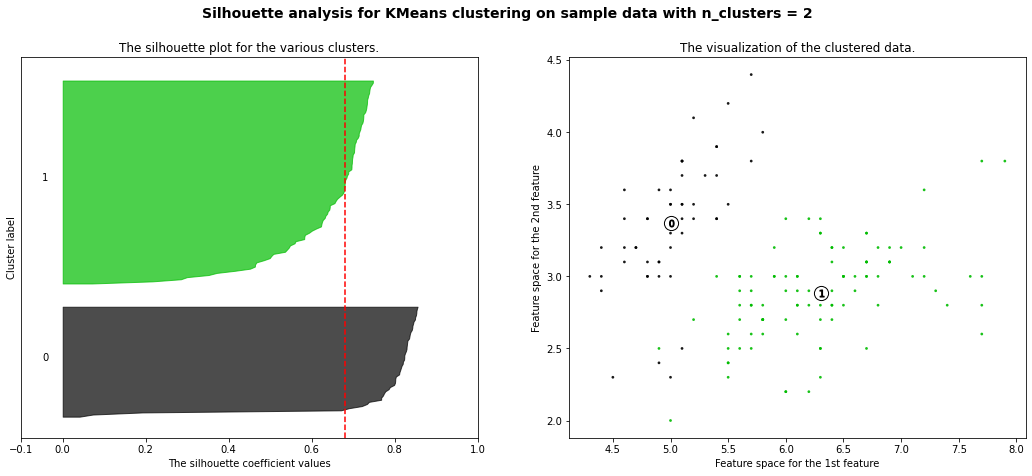

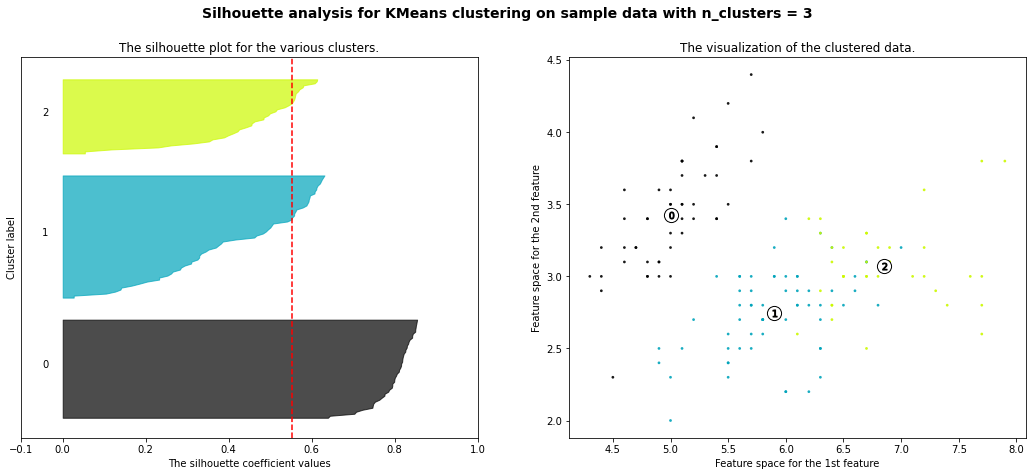

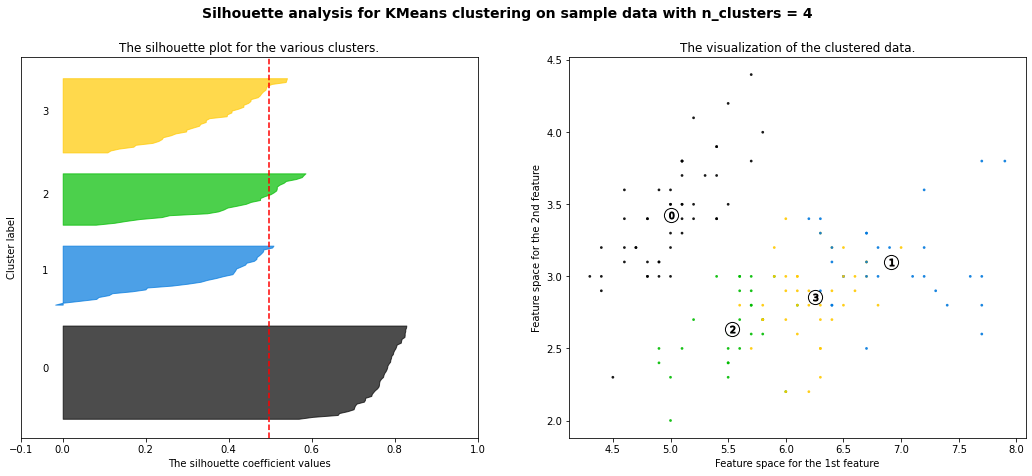

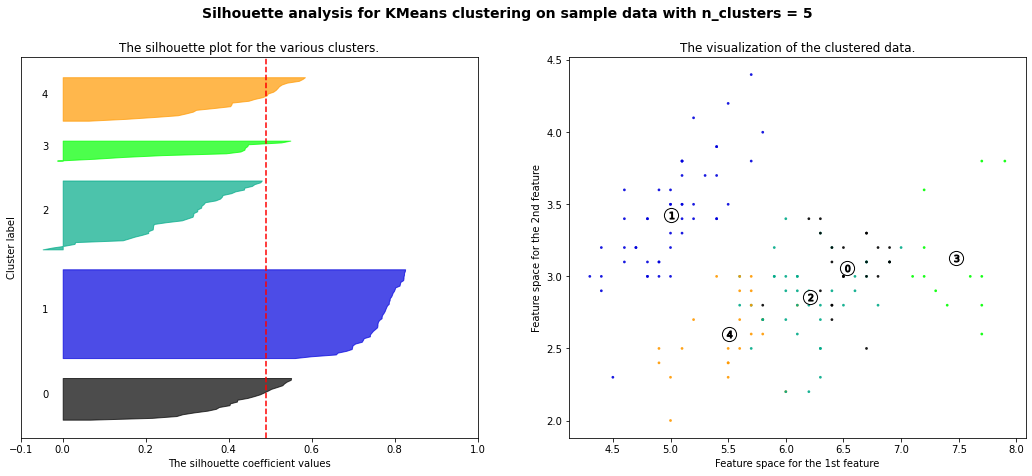

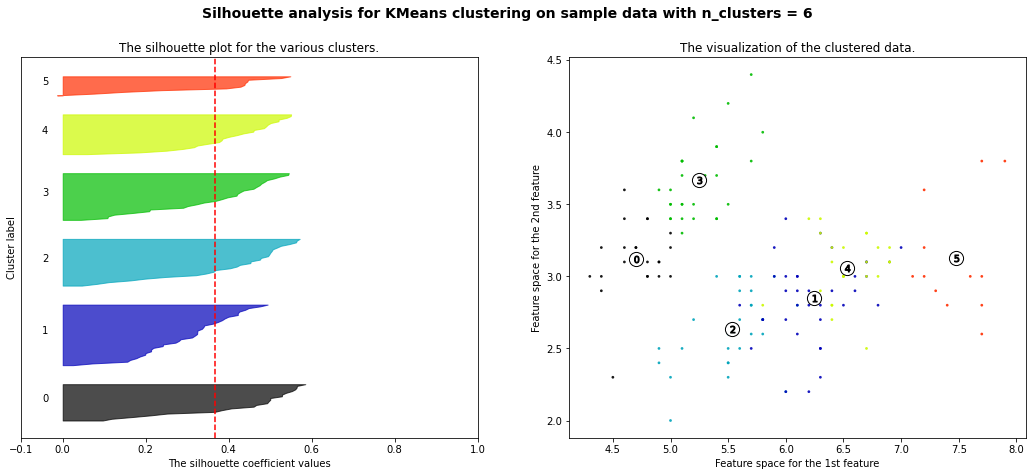

In [43]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.9, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()